# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# 기본 경로
#path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [3]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [5]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [6]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [9]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [11]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv('df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [42]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv('df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
0,종로구,215,5912,646,889,480,3613,962,1413,382,1982
1,중구,235,6414,333,1152,816,3542,24248,982,175,2121
2,용산구,523,2987,466,1214,777,2076,317,1332,573,1184
3,성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545
4,광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678


In [15]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv('df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [48]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [50]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,...,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,...,6508,6255,7273,8320,2528,9020,5008,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,...,1990,1429,1660,1433,1349,2104,1459,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,...,867,997,1095,94,1275,740,1176,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,...,2352,1751,2530,700,1709,2347,2274,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,...,2136,1604,2049,190,1672,1230,1628,248571,248566,497137


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.

### 1) 가설 1: 

### 2) 가설 2: 

### 3) 가설 3: 

### 4) 가설 4: 

### 5) 가설 5: 

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
- 기초통계량
- 분포  
- 위 정보로부터 파악한 내용(비즈니스) 정리  
- 추가 분석해볼 사항 도출 등

### 1)

In [72]:
# 주석
df['평균 승하차 인원'] = (df['승차총승객수'] + df['하차총승객수']) / 2
df_people = df[['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '평균 승하차 인원']]
df_people['혼잡도'] = abs(df_people['승차총승객수'] - df_people['하차총승객수']) / df_people['정류장수']
df_people

df_sorted = df_people.sort_values(by = '혼잡도')
df_sorted
# 의견: 

,자치구,정류장수,노선수,승차총승객수,하차총승객수,평균 승하차 인원,혼잡도
17,송파구,476,62,6172655,6176516,6174585.5,8.111345
3,강서구,565,54,5244615,5218001,5231308.0,47.104425
16,성북구,596,100,6610774,6642472,6626623.0,53.184564
5,광진구,278,43,3207725,3228754,3218239.5,75.643885
15,성동구,432,58,3185165,3134742,3159953.5,116.719907
19,영등포구,466,101,6555386,6611792,6583589.0,121.042918
24,중랑구,384,50,4220995,4167084,4194039.5,140.393229
8,노원구,495,61,4609496,4535591,4572543.5,149.303030
1,강동구,376,24,3306588,3242901,3274744.5,169.380319
21,은평구,494,76,5723211,5636929,5680070.0,174.659919


### 2)

## 주석
서비스업종과 교육시설의 분포도가 높은 지역이 대중교통, 버스를 더 자주 이용할 것이라 예상 → 더 많은 버스 노선이 필요할 것이다.

서비스업종: 한식 일반 음식점업, 두발미용업, 커피전문점, 기타주점업, 한식 육류요리 전문점

교육시설: 일반 교과 학원

### 3)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   자치구              25 non-null     object 
 1   정류장수             25 non-null     int64  
 2   노선수              25 non-null     int64  
 3   승차총승객수           25 non-null     int64  
 4   하차총승객수           25 non-null     int64  
 5   승차평균승객수          25 non-null     float64
 6   하차평균승객수          25 non-null     float64
 7   평균 이동 시간(분)      25 non-null     float64
 8   이동인구(합)          25 non-null     float64
 9   총 이동 시간          25 non-null     int64  
 10  총 이동인구           25 non-null     float64
 11  택시운송업            25 non-null     int64  
 12  한식 일반 음식점업       25 non-null     int64  
 13  용달 화물자동차 운송업     25 non-null     int64  
 14  부동산 중개 및 대리업     25 non-null     int64  
 15  두발미용업            25 non-null     int64  
 16  커피전문점            25 non-null     int64  
 17  남녀용 겉옷 및 셔츠 도매업  2

In [132]:
df['승객수'] = df_people['승차총승객수'] + df_people['하차총승객수']

Text(0.5, 1.0, '구별 승객수합계')

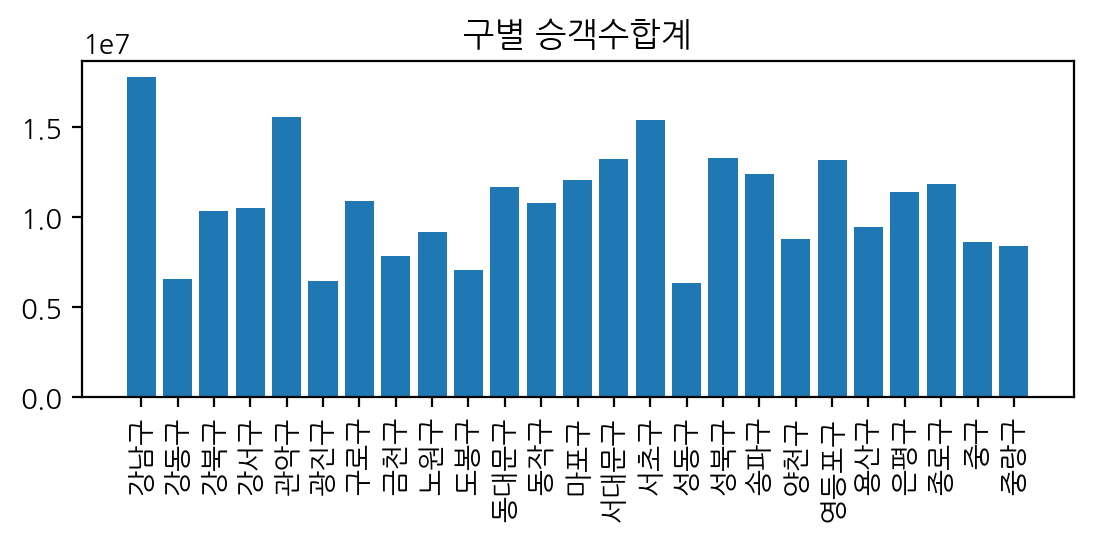

In [149]:
plt.subplot(2, 1, 1)
plt.bar(df['자치구'], df['승객수'])
plt.xticks(rotation=90)
plt.title('구별 승객수합계')

Text(0.5, 1.0, '구별 노선수')

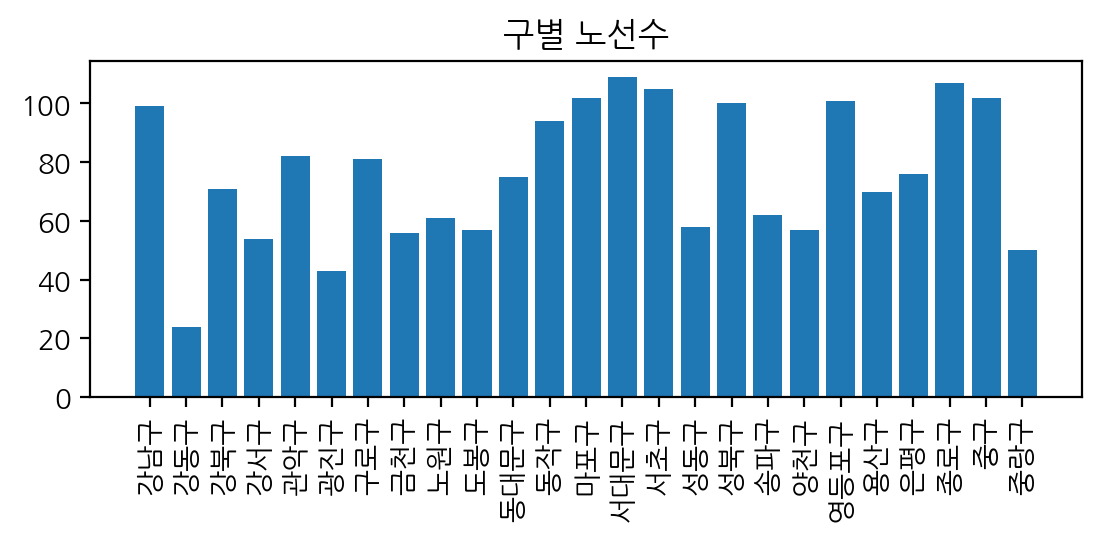

In [151]:
plt.subplot(2, 1, 2)
plt.bar(df['자치구'], df['노선수'])
plt.xticks(rotation=90)
plt.title('구별 노선수')

In [78]:
# 주석
df_service = df[['자치구', '정류장수', '노선수', '평균 승하차 인원',  '한식 일반 음식점업', '두발미용업', '커피전문점','기타주점업','한식 육류요리 전문점','일반 교과 학원']]
df_service['합계'] = df['한식 일반 음식점업'] + df['두발미용업'] + df['커피전문점'] + df['기타주점업'] + df['한식 육류요리 전문점'] + df['일반 교과 학원']
df_service = df_service.sort_values(by = '합계')
df_service

,자치구,정류장수,노선수,평균 승하차 인원,한식 일반 음식점업,두발미용업,커피전문점,기타주점업,한식 육류요리 전문점,일반 교과 학원,합계
9,도봉구,366,57,3534386.5,2009,847,837,477,943,1162,6275
7,금천구,344,56,3914680.0,2619,715,1215,685,1042,487,6763
2,강북구,410,71,5160738.5,2663,997,1095,1275,1176,740,7946
24,중랑구,384,50,4194039.5,2479,1108,1037,1000,1504,1045,8173
11,동작구,435,94,5387708.5,2322,1105,1628,955,1177,1463,8650
13,서대문구,456,109,6595276.5,2694,1185,1323,1127,1088,1268,8685
20,용산구,325,70,4713585.5,2987,777,2076,1332,1184,573,8929
15,성동구,432,58,3159953.5,2785,851,1859,621,1545,1494,9155
10,동대문구,309,75,5829041.0,3566,891,1472,1082,1509,984,9504
6,구로구,478,81,5425106.0,3215,1134,1384,1165,1496,1111,9505


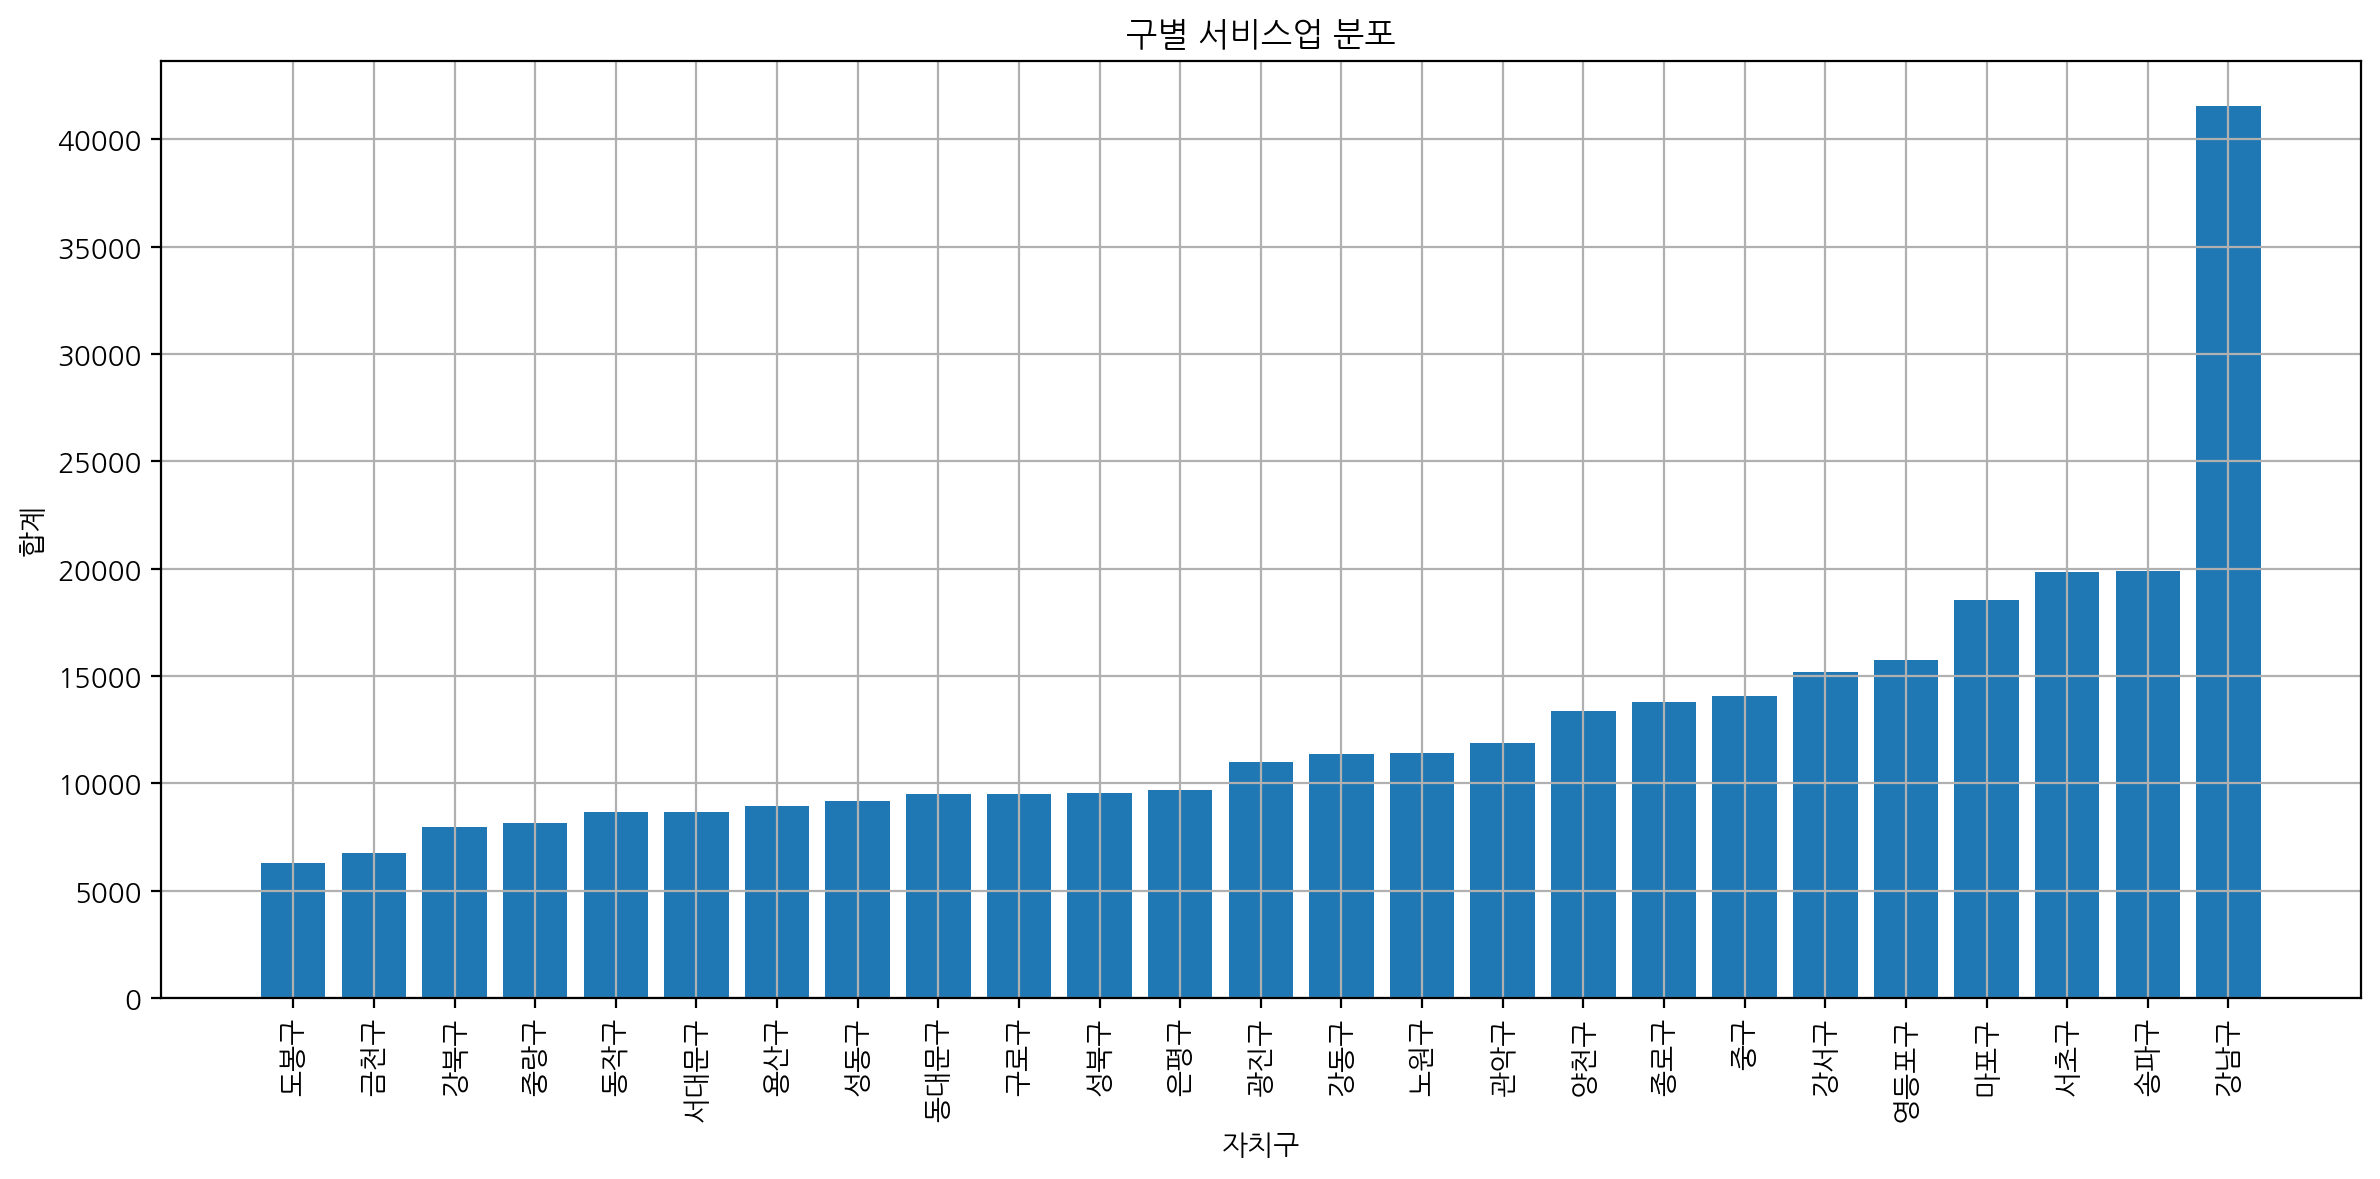

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.title('구별 서비스업 분포')
plt.bar(df_service['자치구'], df_service['합계'])
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('자치구')
plt.ylabel('합계')
plt.tight_layout()
plt.show()


In [95]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 9 to 0
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          25 non-null     object 
 1   정류장수         25 non-null     int64  
 2   노선수          25 non-null     int64  
 3   평균 승하차 인원    25 non-null     float64
 4   한식 일반 음식점업   25 non-null     int64  
 5   두발미용업        25 non-null     int64  
 6   커피전문점        25 non-null     int64  
 7   기타주점업        25 non-null     int64  
 8   한식 육류요리 전문점  25 non-null     int64  
 9   일반 교과 학원     25 non-null     int64  
 10  합계           25 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.3+ KB


# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

### 1) 가설 1

### 가설
#### 서비스업종과 교육시설의 분포도가 높은 지역이 대중교통, 버스를 더 자주 이용할 것이라 예상 → 더 많은 버스 노선이 필요할 것이다.

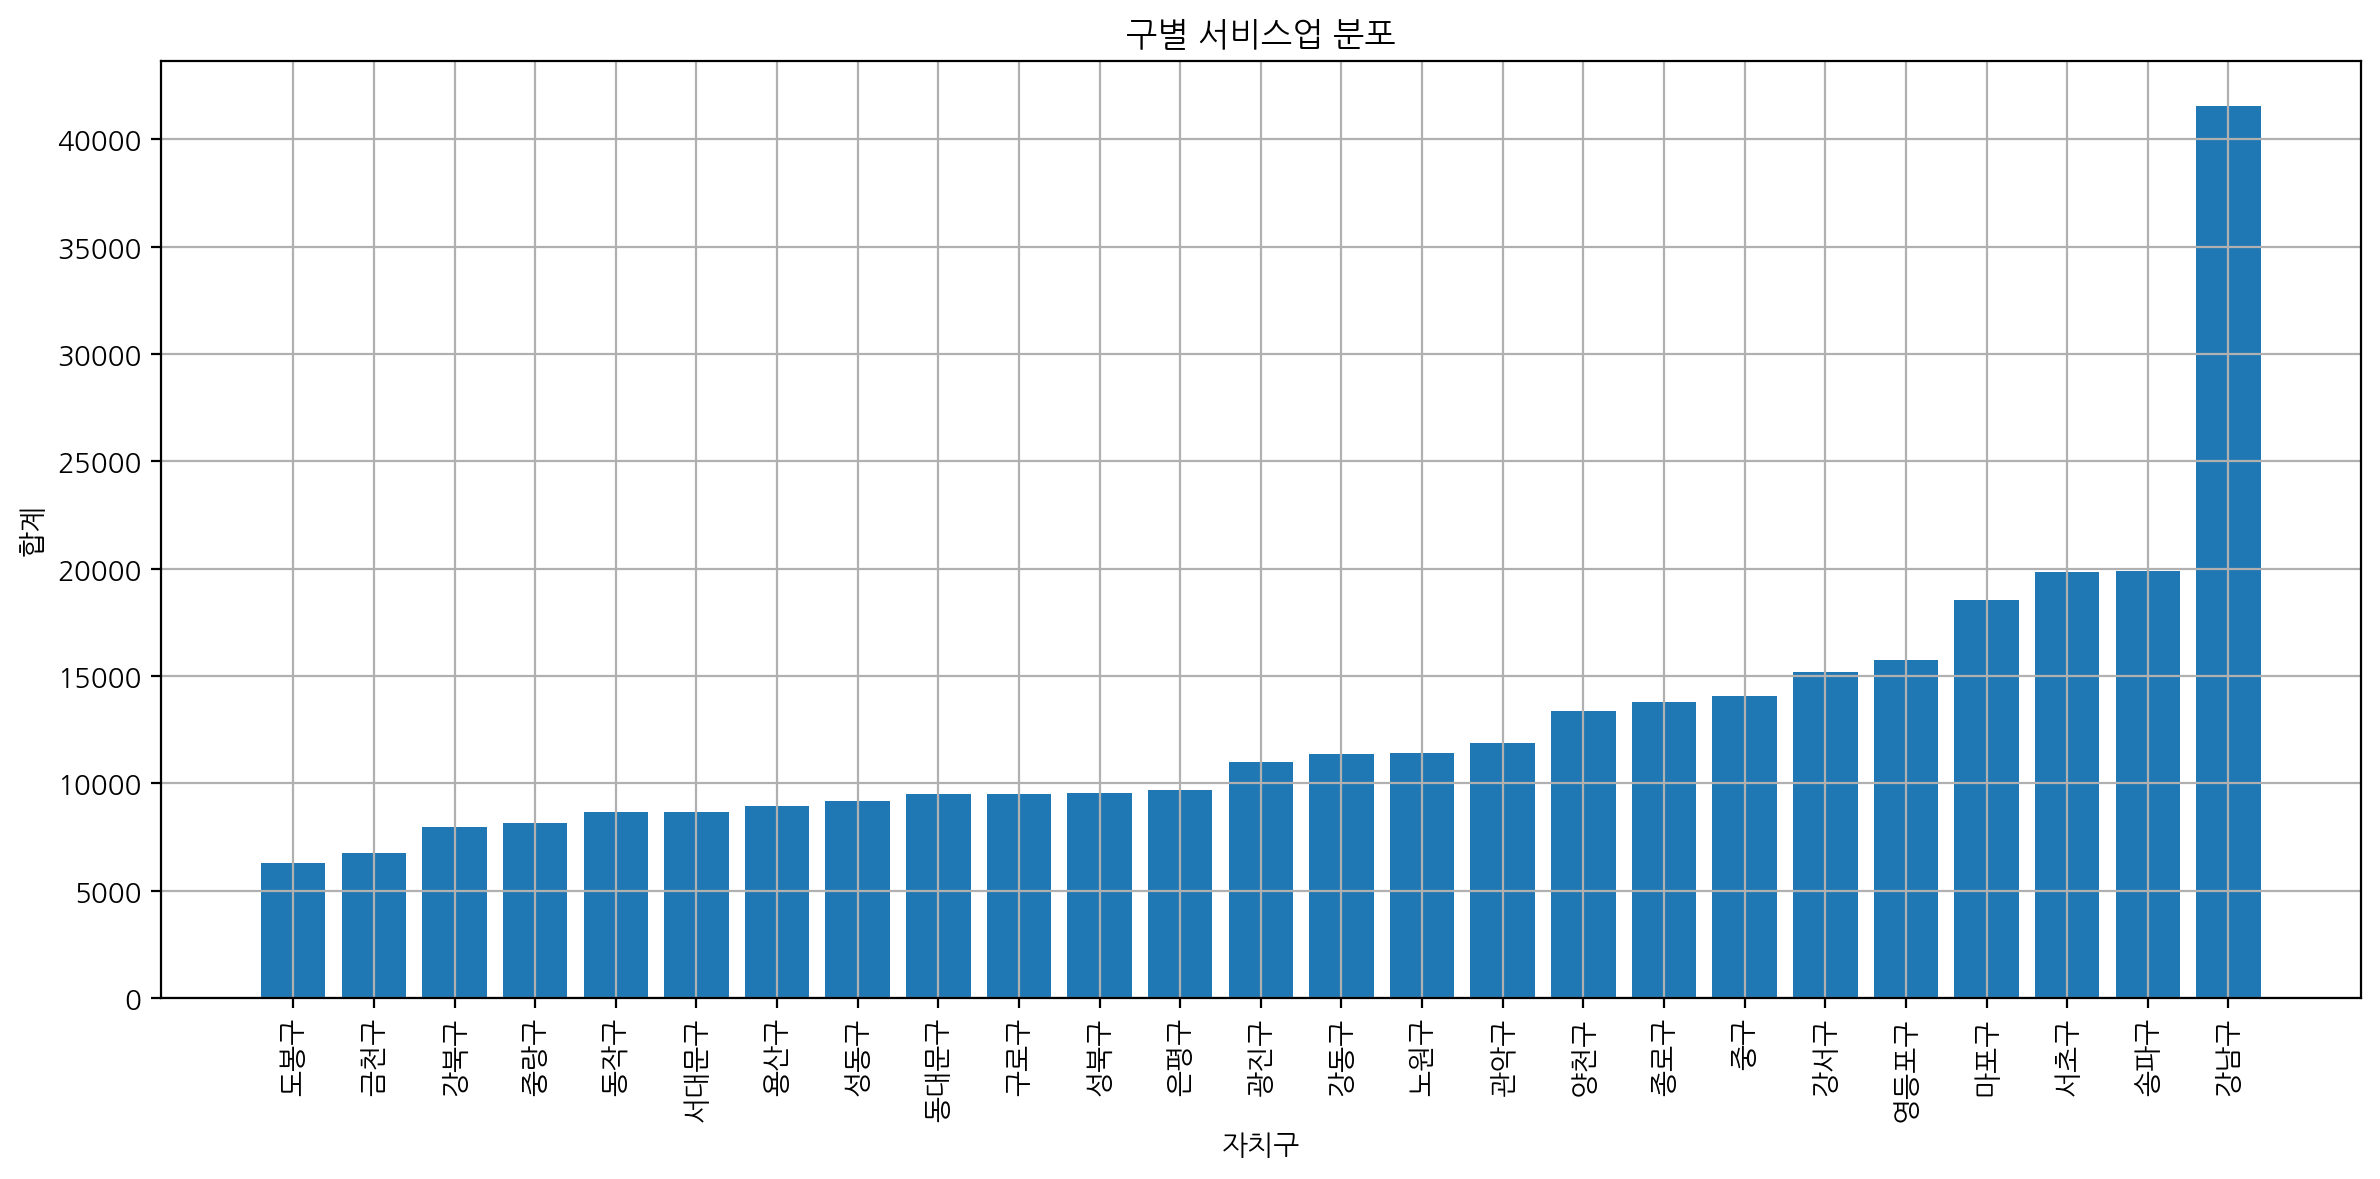

In [107]:
# 주석

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 서비스 분포 분석을 위한 관련 열 선택
df_service = df[['자치구', '정류장수', '노선수', '평균 승하차 인원',  
                  '한식 일반 음식점업', '두발미용업', '커피전문점', 
                  '기타주점업', '한식 육류요리 전문점', '일반 교과 학원']]

# 서비스 업종의 총합 계산
df_service['합계'] = (df['한식 일반 음식점업'] + 
                      df['두발미용업'] + 
                      df['커피전문점'] + 
                      df['기타주점업'] + 
                      df['한식 육류요리 전문점'] + 
                      df['일반 교과 학원'])

# '합계'를 기준으로 데이터프레임 정렬
df_service = df_service.sort_values(by='합계')

# 자치구별 서비스 업종 분포 막대그래프 그리기
plt.figure(figsize=(12, 6))
plt.title('구별 서비스업 분포')
plt.bar(df_service['자치구'], df_service['합계'])
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('자치구')
plt.ylabel('합계')
plt.tight_layout()
plt.show()



#### 위는 서비스업과 교육시설의 분포를 구별로 나타낸 것이다. 보면 강남구가 앞도적으로 서비스업과 교육시설이 많다는 것을 볼 수 있다.

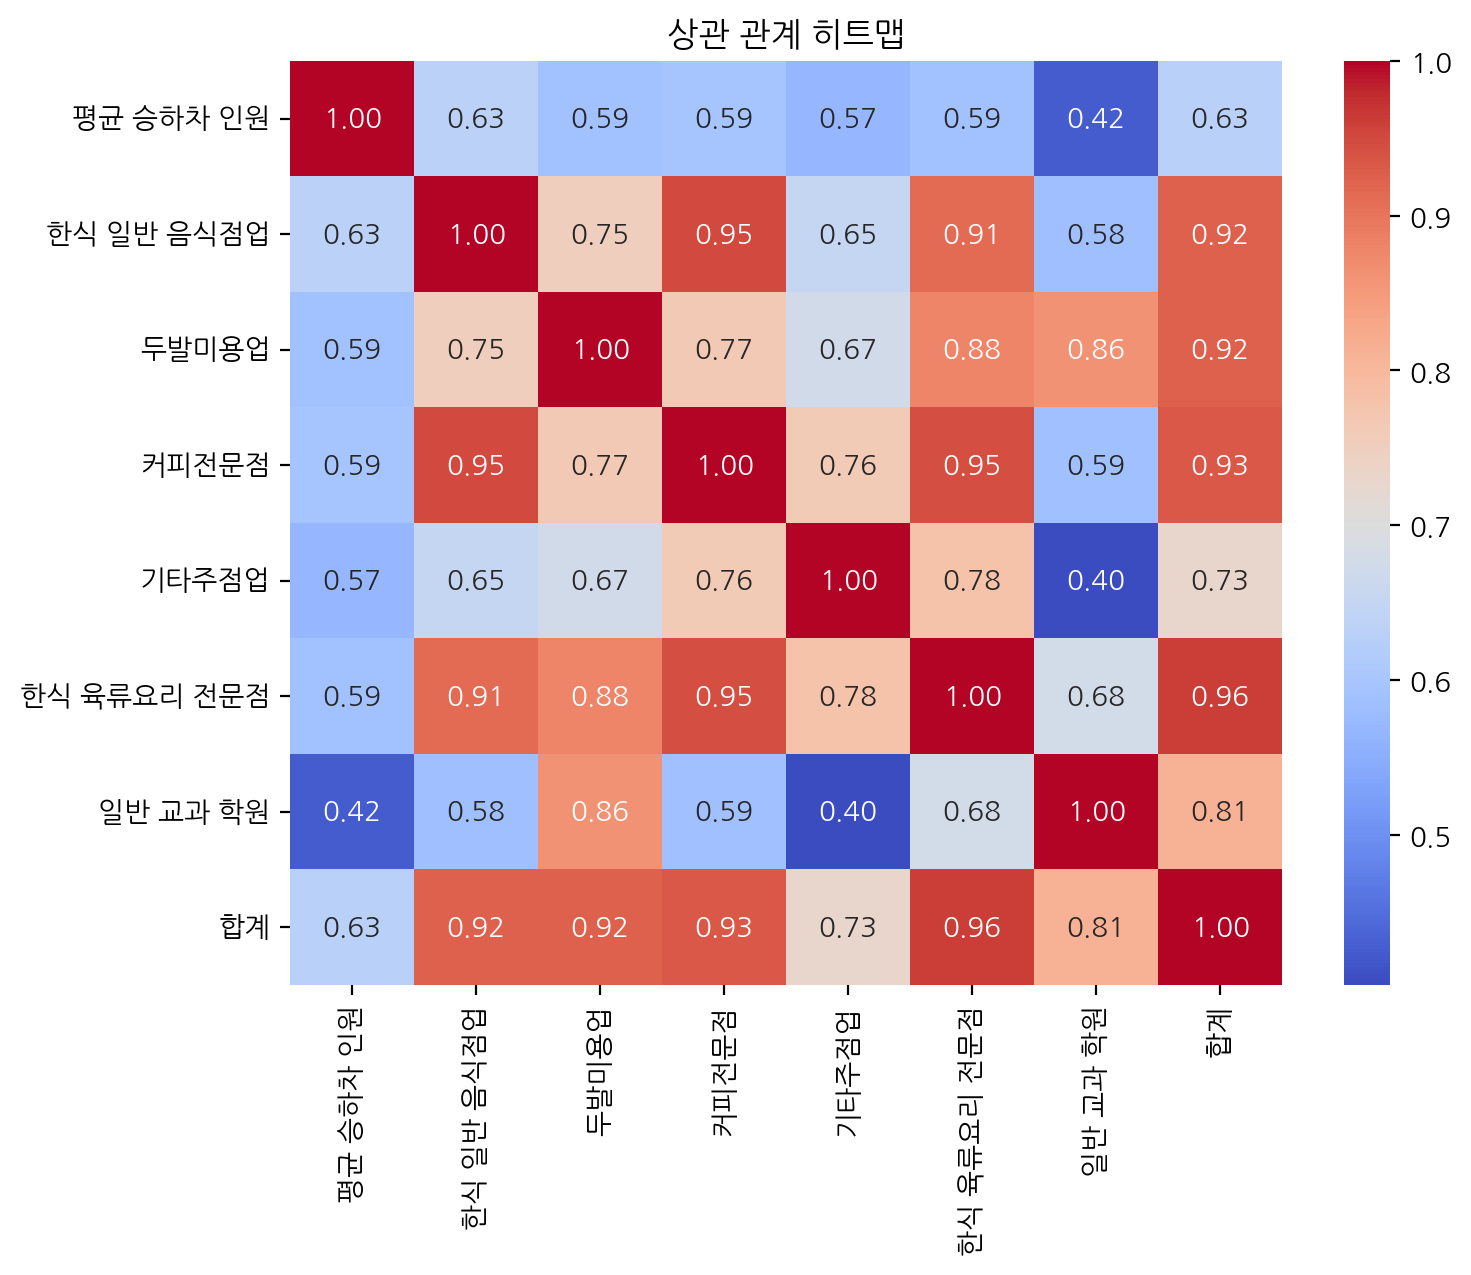

In [109]:
# 상관관계 분석을 위한 데이터프레임 준비
df_service_2 = df_service[['평균 승하차 인원', '한식 일반 음식점업', 
                            '두발미용업', '커피전문점', 
                            '기타주점업', '한식 육류요리 전문점', 
                            '일반 교과 학원', '합계']]

# 상관관계 행렬 계산 및 시각화
correlation_matrix = df_service_2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관 관계 히트맵')
plt.show()



#### 합계: 서비스업과 교육시설을 모두 합한 변수

#### 0.5~1 사이가 상관관계가 높다고 판단 즉, 위 그래프에서 가장 아랫줄을 보면 합계와 모든 서비스업과 교육시설이 보다 높은 수치가 보인다

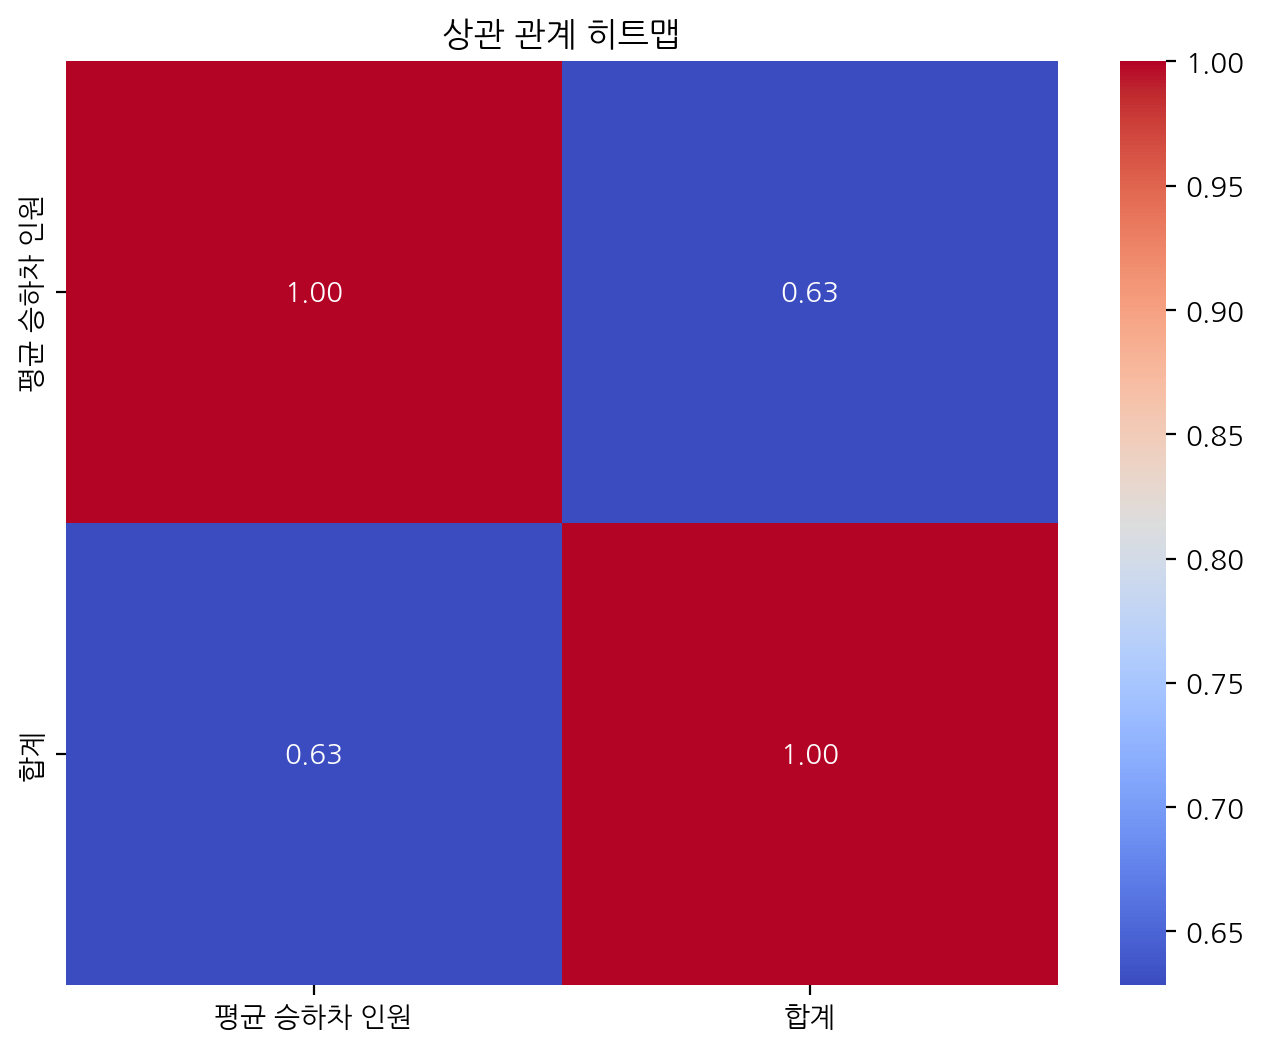

In [113]:
# 특정 상관관계 분석을 위한 데이터프레임 준비
df_service_1 = df_service[['평균 승하차 인원', '합계']]

# '합계'와 '평균 승하차 인원'의 상관관계 행렬 계산 및 시각화
correlation_matrix_1 = df_service_1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관 관계 히트맵')
plt.show()


In [117]:
# 피어슨 상관관계 검정 수행
x = df_service_1['합계']
y = df_service_1['평균 승하차 인원']
corr, p_value = stats.pearsonr(x, y)

print(f"상관관계: {corr:.2f}, P-값: {p_value:.4f}")

상관관계: 0.63, P-값: 0.0008


#### p-값 0.05보다 낮으므로 유의하다고 볼 수 있다. 즉, 서비스업종과 교육시설의 분포도가 높은 지역에 대중교통 노선을 추가하면 효율적이라고 볼 수 있다.

# 6. 관계 정리

### 1) 강한 관계의 열

### 2) 중간 관계의 열

# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

### 1) 

In [ ]:
# 주석



# 의견: 

### 2) 

In [ ]:
# 주석



# 의견:

### 3) 

In [ ]:
# 주석



# 의견:

### 4) 

In [ ]:
# 주석



# 의견:

### 결론1: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

### 결론2: 그 이유는 무엇인가요?